## Cross-Validation with Linear Regression




##  Experiments to Understand Overfitting



In [565]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import warnings 
warnings.filterwarnings('ignore')

In [566]:
housing = pd.read_csv('Housing.csv')
housing.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [567]:
len(housing.index)

545

In [568]:
df = housing.loc[:, ['area', 'price']]
df.head()

area     price
0  7420  13300000
1  8960  12250000
2  9960  12250000
3  7500  12215000
4  7420  11410000

In [569]:
df_columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df.columns = df_columns
df.head()

area     price
0  0.396564  1.000000
1  0.502405  0.909091
2  0.571134  0.909091
3  0.402062  0.906061
4  0.396564  0.836364

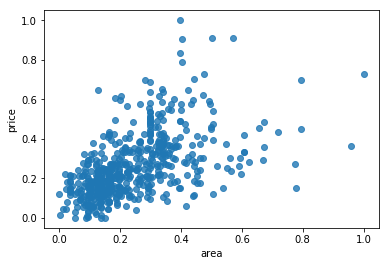

In [570]:
sns.regplot(x="area", y="price", data=df, fit_reg=False)

In [571]:
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

381
164


In [572]:
X_train = df_train['area']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['price']
X_test = df_test['area']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['price']

### Polynomial Regression



In [573]:
len(X_train)

381

In [574]:
degrees = [1, 2, 3, 6, 10, 20]
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))
for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)
    

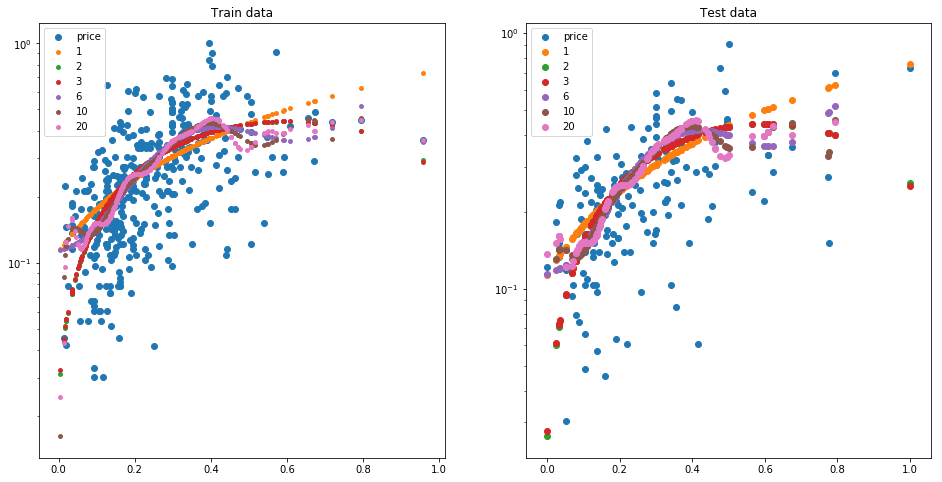

In [575]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [576]:
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.29, test score=0.25
Polynomial degree 2: train score=0.34, test score=0.22
Polynomial degree 3: train score=0.34, test score=0.22
Polynomial degree 6: train score=0.36, test score=0.11
Polynomial degree 10: train score=0.37, test score=-108.76
Polynomial degree 20: train score=0.38, test score=-299928623752.57


##  Building a Model Without Cross-Validation



In [577]:
binary_vars_list =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
housing[binary_vars_list] = housing[binary_vars_list].apply(binary_map)
housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

In [578]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
status.head()

semi-furnished  unfurnished
0               0            0
1               0            0
2               1            0
3               0            0
4               0            0

In [579]:
housing = pd.concat([housing, status], axis = 1)
housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  semi-furnished  unfurnished  
0        furnished               0            0  
1        furnished               0            0  
2   semi-furnished               1            0  
3        furnished               0            0  
4        furnished               0            0

In [580]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   semi-furnished  unfurnished  
0               0            0  
1               0            0  
2               1            0  
3               0            0  
4               0            0

#### Splitting Into Train and Test

In [581]:
df_train, df_test = train_test_split(housing, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)
scaler = MinMaxScaler()
numeric_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
359  0.169697  0.155227       0.4        0.0  0.000000         1          0   
19   0.615152  0.403379       0.4        0.5  0.333333         1          0   
159  0.321212  0.115628       0.4        0.5  0.000000         1          1   
35   0.548133  0.454417       0.4        0.5  1.000000         1          0   
28   0.575758  0.538015       0.8        0.5  0.333333         1          0   

     basement  hotwaterheating  airconditioning   parking  prefarea  \
359         0                0                0  0.333333         0   
19          0                0                1  0.333333         1   
159         1                0                1  0.000000         0   
35          0                0                1  0.666667         0   
28          1                1                0  0.666667         0   

     semi-furnished  unfurnished  
359               0            1  
19                1            0  
159               0            0  
35                0            0  
28                0            1

In [582]:
df_test[numeric_vars] = scaler.fit_transform(df_test[numeric_vars])
df_test.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
265  0.247651  0.084536  0.333333   0.000000  0.333333         1          0   
54   0.530201  0.298969  0.333333   0.333333  0.333333         1          1   
171  0.328859  0.592371  0.333333   0.000000  0.000000         1          0   
244  0.261745  0.252234  0.333333   0.000000  0.333333         1          1   
268  0.245638  0.226804  0.666667   0.000000  0.333333         1          0   

     basement  hotwaterheating  airconditioning   parking  prefarea  \
265         0                0                0  0.000000         1   
54          0                0                1  0.333333         0   
171         0                0                0  0.333333         1   
244         1                0                0  0.000000         1   
268         0                0                1  0.000000         0   

     semi-furnished  unfurnished  
265               1            0  
54                1            0  
171               1            0  
244               1            0  
268               1            0

In [583]:
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

#### Using RFE 

In [584]:
len(X_train.columns)

13

In [585]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

In [586]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [587]:
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5812051458999572


In [588]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=6)             
rfe = rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5350445027578821


## Cross-Validation in sklearn


### K-Fold CV

In [589]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores      

array([0.6829775 , 0.69324306, 0.6762109 , 0.61782891, 0.59266171])

In [590]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.59930574, 0.71307628, 0.61325733, 0.62739077, 0.6212937 ])

In [591]:
scores = cross_val_score(lm, X_train, y_train, scoring='mean_squared_error', cv=5)
scores

array([-0.00806336, -0.00658776, -0.0064797 , -0.0070743 , -0.01523682])

### Hyperparameter Tuning Using Grid Search Cross-Validation

In [592]:
len(X_train.columns)

13

In [593]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 14))}]
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [594]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.021255      0.004623         0.000754        0.000177   
1        0.011884      0.002191         0.000645        0.000187   
2        0.010464      0.001464         0.000561        0.000027   
3        0.009211      0.000434         0.000540        0.000012   
4        0.008505      0.000537         0.000547        0.000034   
5        0.007733      0.000240         0.000545        0.000022   
6        0.006756      0.000089         0.000537        0.000007   
7        0.006009      0.000059         0.000532        0.000009   
8        0.005458      0.000290         0.000535        0.000011   
9        0.004963      0.000692         0.000544        0.000022   
10       0.004004      0.000257         0.000592        0.000131   
11       0.003051      0.000100         0.000520        0.000006   
12       0.002276      0.000162         0.000509        0.000005   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
5                           6   {'n_features_to_select': 6}   
6                           7   {'n_features_to_select': 7}   
7                           8   {'n_features_to_select': 8}   
8                           9   {'n_features_to_select': 9}   
9                          10  {'n_features_to_select': 10}   
10                         11  {'n_features_to_select': 11}   
11                         12  {'n_features_to_select': 12}   
12                         13  {'n_features_to_select': 13}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.172606           0.351721           0.206887   
1            0.335665           0.428751           0.439969   
2            0.421848           0.539257           0.491515   
3            0.449487           0.567101           0.494461   
4            0.494779           0.610200           0.492807   
5            0.512477           0.628849           0.488411   
6            0.568887           0.664093           0.552385   
7            0.570639           0.665608           0.592323   
8            0.578843           0.694189           0.606220   
9            0.574376           0.693197           0.601972   
10           0.578083           0.707264           0.608905   
11           0.602951           0.713417           0.613593   
12           0.599306           0.713076           0.613257   

    split3_test_score       ...         mean_test_score  std_test_score  \
0            0.165910       ...                0.243471        0.077611   
1            0.505321       ...                0.438090        0.058533   
2            0.604426       ...                0.516555        0.060021   
3            0.600237       ...                0.526070        0.053150   
4            0.590812       ...                0.541765        0.049251   
5            0.527379       ...                0.540988        0.047988   
6            0.534634       ...                0.577613        0.044949   
7            0.550001       ...                0.591740        0.039391   
8            0.590777       ...                0.615256        0.040756   
9            0.594335       ...                0.608457        0.043476   
10           0.621282       ...                0.624741        0.043607   
11           0.631241       ...                0.636690        0.039443   
12           0.627391       ...                0.634771        0.040209   

    rank_test_score  split0_train_score  split1_train_score  \
0                13            0.302971            0.265961   
1                12            0.505799            0.489802   
2                11            0.568074      

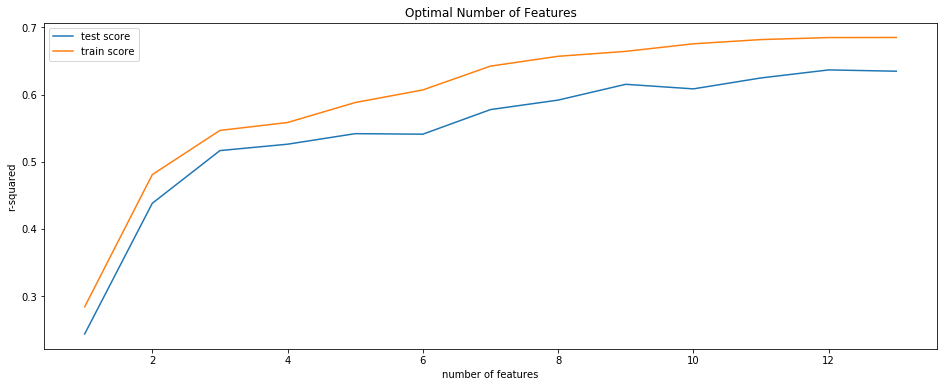

In [595]:
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [596]:
n_features_optimal = 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.599557533872853


### Another Example: Car Price Prediction

In [597]:
cars = pd.read_csv("CarPrice_Assignment.csv")

In [598]:
cars['symboling'] = cars['symboling'].astype('object')
p = re.compile(r'\w+-?\w+')
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
cars.loc[(cars['car_company'] == "vw") | 
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'
cars = cars.drop('CarName', axis=1)
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]
y = cars['price']
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()
X = X.drop(list(cars_categorical.columns), axis=1)
X = pd.concat([X, cars_dummies], axis=1)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

In [599]:
len(X_train.columns)

68

In [600]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(2, 40))}]
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:   12.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [601]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.080977      0.014933         0.000463    1.605575e-05   
1        0.072639      0.000502         0.000510    1.230776e-04   
2        0.075410      0.004731         0.000449    1.406468e-06   
3        0.072320      0.000901         0.000450    1.512408e-06   
4        0.070245      0.000234         0.000481    6.004450e-05   
5        0.073988      0.004944         0.000533    9.688582e-05   
6        0.071237      0.002765         0.000455    4.665700e-06   
7        0.068408      0.000527         0.000455    4.505039e-06   
8        0.071769      0.003848         0.000458    8.098655e-06   
9        0.068091      0.002635         0.000458    6.324881e-06   
10       0.065974      0.000170         0.000462    1.365754e-05   
11       0.071652      0.011210         0.000466    1.353999e-05   
12       0.065336      0.000592         0.000460    5.230884e-06   
13       0.066241      0.004866         0.000483    4.721194e-05   
14       0.064967      0.001730         0.000460    1.549537e-06   
15       0.068873      0.004905         0.000462    3.749772e-06   
16       0.069526      0.004974         0.000518    7.734713e-05   
17       0.060862      0.000792         0.000461    2.301696e-06   
18       0.059948      0.000405         0.000467    4.291534e-06   
19       0.059856      0.001099         0.000529    1.302623e-04   
20       0.060118      0.002698         0.000524    1.172173e-04   
21       0.057417      0.000536         0.000459    9.956652e-07   
22       0.056351      0.000323         0.000463    4.341575e-06   
23       0.059238      0.003907         0.000523    1.207523e-04   
24       0.055106      0.001007         0.000462    1.741598e-06   
25       0.056810      0.002534         0.000524    7.280936e-05   
26       0.089414      0.016823         0.000632    1.292317e-04   
27       0.056095      0.003312         0.000469    5.823273e-06   
28       0.069551      0.012552         0.000668    1.074558e-04   
29       0.072766      0.024778         0.000593    1.596130e-04   
30       0.049456      0.000566         0.000582    2.108430e-04   
31       0.064888      0.009813         0.000585    1.793140e-04   
32       0.050363      0.002295         0.000485    1.368448e-05   
33       0.046479      0.000808         0.000470    1.886974e-06   
34       0.045449      0.000894         0.000470    4.022426e-06   
35       0.044488      0.000677         0.000477    8.201599e-06   
36       0.052455      0.006477         0.000611    2.521245e-04   
37       0.048690      0.001671         0.000575    9.897910e-05   

   param_n_features_to_select                        params  \
0                           2   {'n_features_to_select': 2}   
1                           3   {'n_features_to_select': 3}   
2                           4   {'n_features_to_select': 4}   
3                           5   {'n_features_to_select': 5}   
4                           6   {'n_features_to_select': 6}   
5                           7   {'n_features_to_select': 7}   
6                           8   {'n_features_to_select': 8}   
7                           9   {'n_features_to_select': 9}   
8                          10  {'n_features_to_select': 10}   
9                          11  {'n_features_to_select': 11}   
10                         12  {'n_features_to_select': 12}   
11                         13  {'n_features_to_select': 13}   
12                         14  {'n_features_to_select': 14}   
13                         15  {'n_features_to_select': 15}   
14                         16  {'n_features_to_select': 16}   
15                         17  {'n_features_to_select': 17}   
16                         18  {'n_features_to_select': 18}   
17                         19  {'n_features_to_select': 19}   
18                         20  {'n_features_to_select': 20}   
19                         21  {'n_features_to_select': 21}   
20                         2

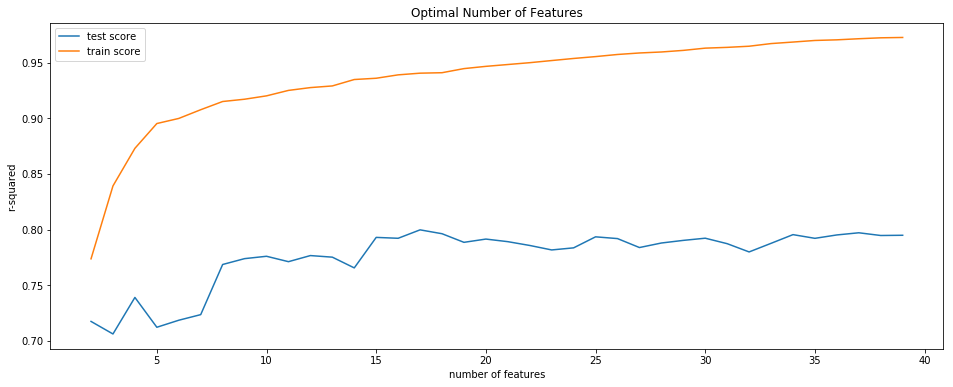

In [602]:
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

#### Additional Reading ####
The sklearn documentation enlists all CV schemes <a href="http://scikit-learn.org/stable/modules/cross_validation.html">here.</a>
